In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, accuracy_score


## Load Data

In [23]:
df = pd.read_csv("Z:\ML\Assignment3\Potuguesebank.csv",sep=";")
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


## Data Cleaning

In [24]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

#### No Null in the Data

In [25]:
# Check for duplicates
duplicates = df.duplicated().sum()
duplicates

0

#### No Duplicate values Present

In [26]:
# Check data types
data_types = df.dtypes
data_types

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

#### Datatypes present :- int64, Object 

## EDA

In [27]:
# Encode categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le


In [28]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,1
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,1
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2,1
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3,0


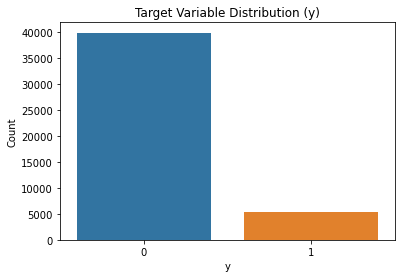

In [29]:
# 1. Distribution of Target Variable 'y'
plt.figure(figsize=(6, 4))
sns.countplot(x='y', data=df)
plt.title('Target Variable Distribution (y)')
plt.xlabel('y')
plt.ylabel('Count')
plt.show()


significant class imbalance in the target variable yy, with a much higher count of class 0 compared to class 1.

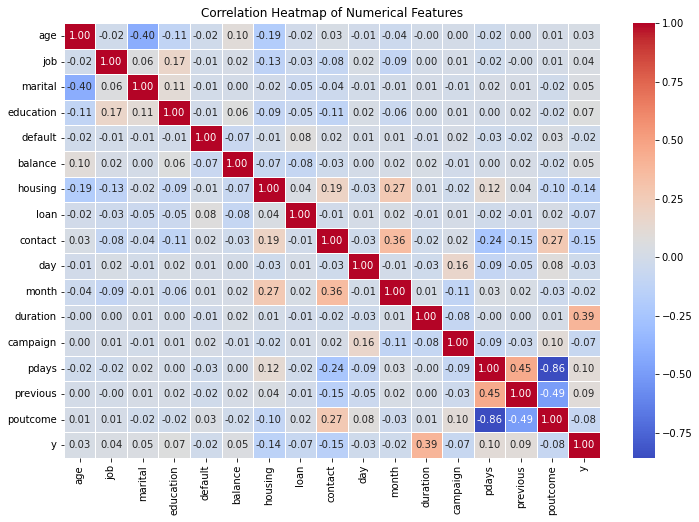

In [30]:
# Step 2: Correlation Heatmap
corr = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()



<br>The heatmap shows weak correlations between most features and the target variable y, with duration having the highest positive correlation (~0.39).<br>
<br>Some features, like poutcome and previous, exhibit moderate correlations, suggesting they may have some predictive power.<br>
<br>Highly correlated independent features (e.g., poutcome & previous, campaign & pdays) may indicate multicollinearity, which should be addressed.

## Feature Selection for Logistic Regression

In [13]:
corr_matrix = df.corr()
threshold = 0.1  # Adjust based on requirement
selected_features = corr_matrix["y"].abs().sort_values(ascending=False).index[1:]
X = df[selected_features]
y = df["y"]

In [14]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Feature Engineering

In [15]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the Logistic Regression Model

In [16]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [17]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Model Evaluation

In [18]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

In [19]:
# Display results
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)
print("ROC AUC Score:", roc_auc)


Accuracy: 0.8778173190984578
Confusion Matrix:
 [[6455  157]
 [ 770  205]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.98      0.93      6612
           1       0.57      0.21      0.31       975

    accuracy                           0.88      7587
   macro avg       0.73      0.59      0.62      7587
weighted avg       0.85      0.88      0.85      7587

ROC AUC Score: 0.8666632540679728


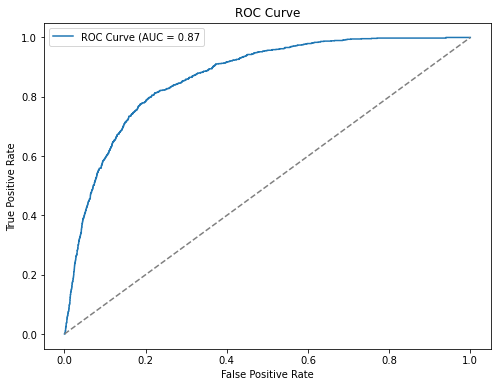

In [20]:
# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Conclusion

<br>The logistic regression model achieved an accuracy of 87.78%, indicating good overall performance.
<br>However, the model struggles with class imbalance, as seen in the classification report where recall for class 1 is only 21%.
<br>The ROC AUC score of 86.67% suggests a strong ability to distinguish between classes.
<br>Further improvements could be made by addressing class imbalance through techniques such as resampling or adjusting decision thresholds.
